In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA





players_stats = pd.read_csv('/Users/utkugulbardak/Documents/timeseries/datasets/nbaarchive/Player per game.csv')

players_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32283 entries, 0 to 32282
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seas_id        32283 non-null  int64  
 1   season         32283 non-null  int64  
 2   player_id      32283 non-null  int64  
 3   player         32283 non-null  object 
 4   birth_year     2872 non-null   float64
 5   pos            32283 non-null  object 
 6   age            32261 non-null  float64
 7   experience     32283 non-null  int64  
 8   lg             32283 non-null  object 
 9   tm             32283 non-null  object 
 10  g              32283 non-null  int64  
 11  gs             23646 non-null  float64
 12  mp_per_game    31200 non-null  float64
 13  fg_per_game    32283 non-null  float64
 14  fga_per_game   32283 non-null  float64
 15  fg_percent     32107 non-null  float64
 16  x3p_per_game   25931 non-null  float64
 17  x3pa_per_game  25931 non-null  float64
 18  x3p_pe

Preparing Data with filtering certain seasons( from 1989 via Michael Jordan)

In [2]:
players_stats_filtered = players_stats[players_stats['season'].between(1989,2025)]

print(players_stats_filtered.tail())


       seas_id  season  player_id           player  birth_year pos   age  \
20916    11796    1989       2477      Will Perdue         NaN   C  23.0   
20917    11797    1989       2478  Willie Anderson         NaN  SF  22.0   
20918    11798    1989       2400    Winston Crite         NaN  SF  23.0   
20919    11799    1989       2401  Winston Garland         NaN  PG  24.0   
20920    11800    1989       2278  Xavier McDaniel         NaN  SF  25.0   

       experience   lg   tm  ...  ft_percent  orb_per_game  drb_per_game  \
20916           1  NBA  CHI  ...       0.571           0.6           0.9   
20917           1  NBA  SAS  ...       0.775           1.9           3.3   
20918           2  NBA  PHO  ...         NaN           0.5           0.0   
20919           2  NBA  GSW  ...       0.809           1.3           2.9   
20920           4  NBA  SEA  ...       0.732           2.2           3.1   

       trb_per_game  ast_per_game  stl_per_game  blk_per_game  tov_per_game  \
20916  

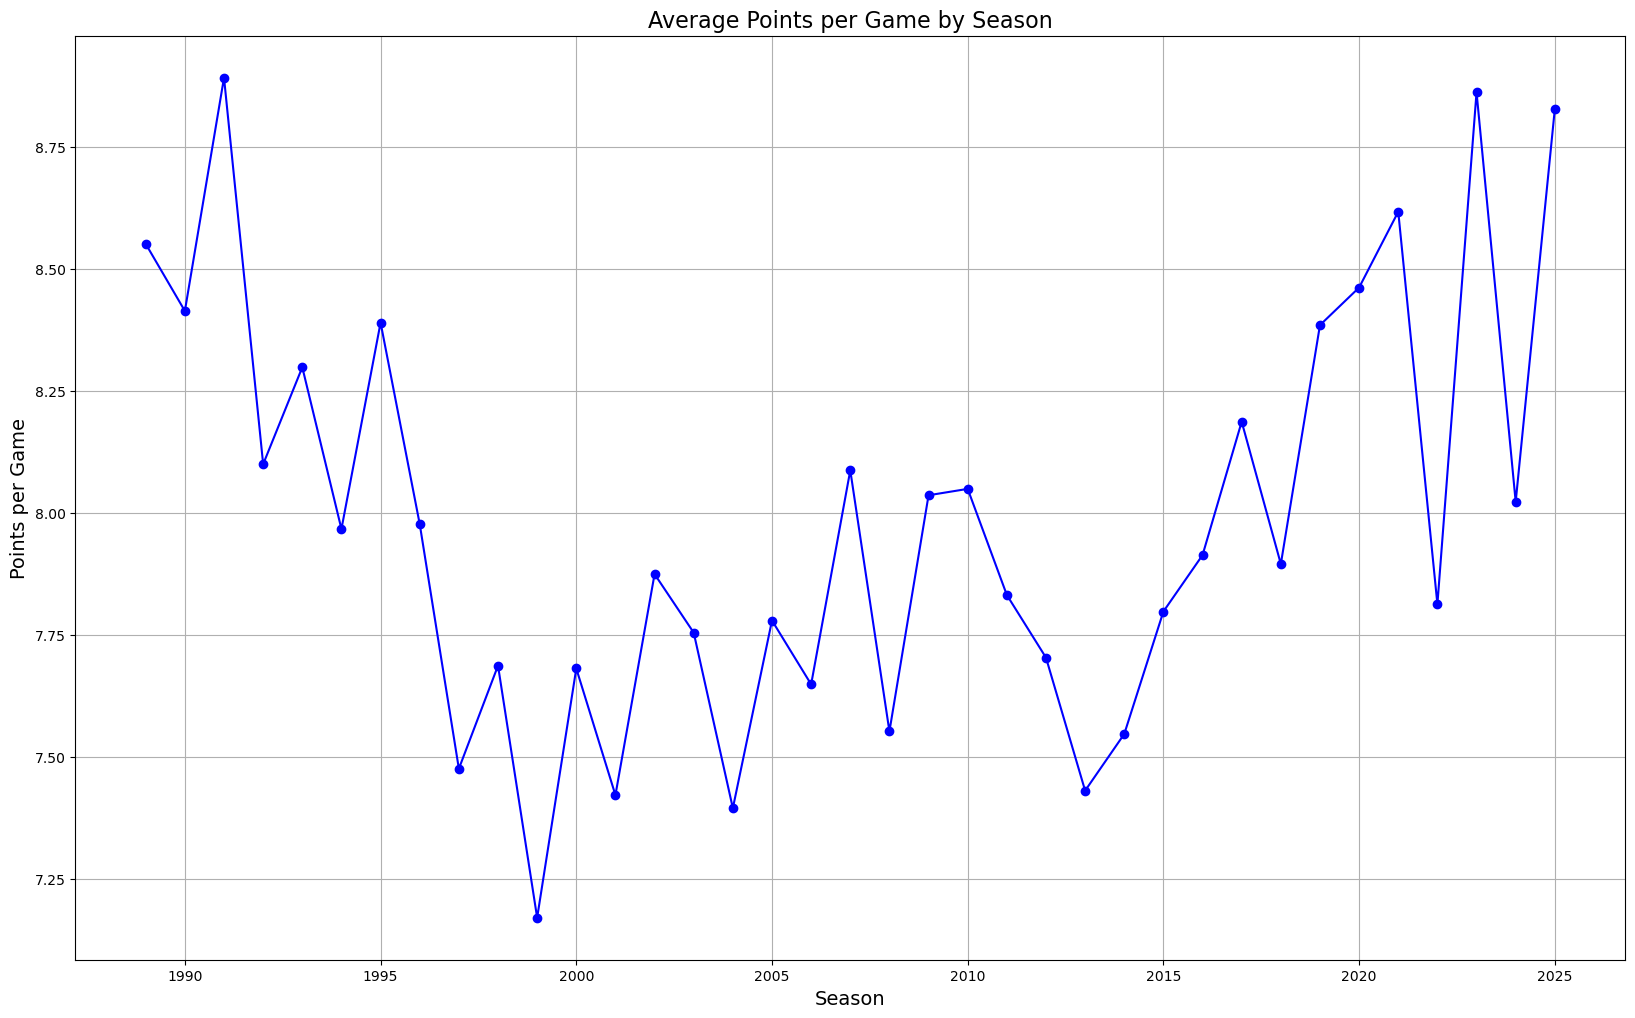

In [3]:
seasonal_avg_ppg = players_stats_filtered.groupby('season')['pts_per_game'].mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(seasonal_avg_ppg['season'], seasonal_avg_ppg['pts_per_game'], marker='o',color = 'blue')
plt.title('Average Points per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Points per Game', fontsize = 14)
plt.grid(True)
plt.show()

         
         


In [4]:
time_series_ppg = seasonal_avg_ppg.set_index('season')['pts_per_game']

model = ARIMA(time_series_ppg, order=(5,1,0))
model_fit = model.fit()

forecast = model.fit().forecast(steps=3)
forecast_seasons = [2026,2027,2028]

for season,ppg in zip(forecast_seasons, forecast):
    print(f'Forecast for season {season}: {ppg}') 

Forecast for season 2026: 8.102259700368089
Forecast for season 2027: 8.561404052008355
Forecast for season 2028: 8.373301803334007


/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/utku-env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model

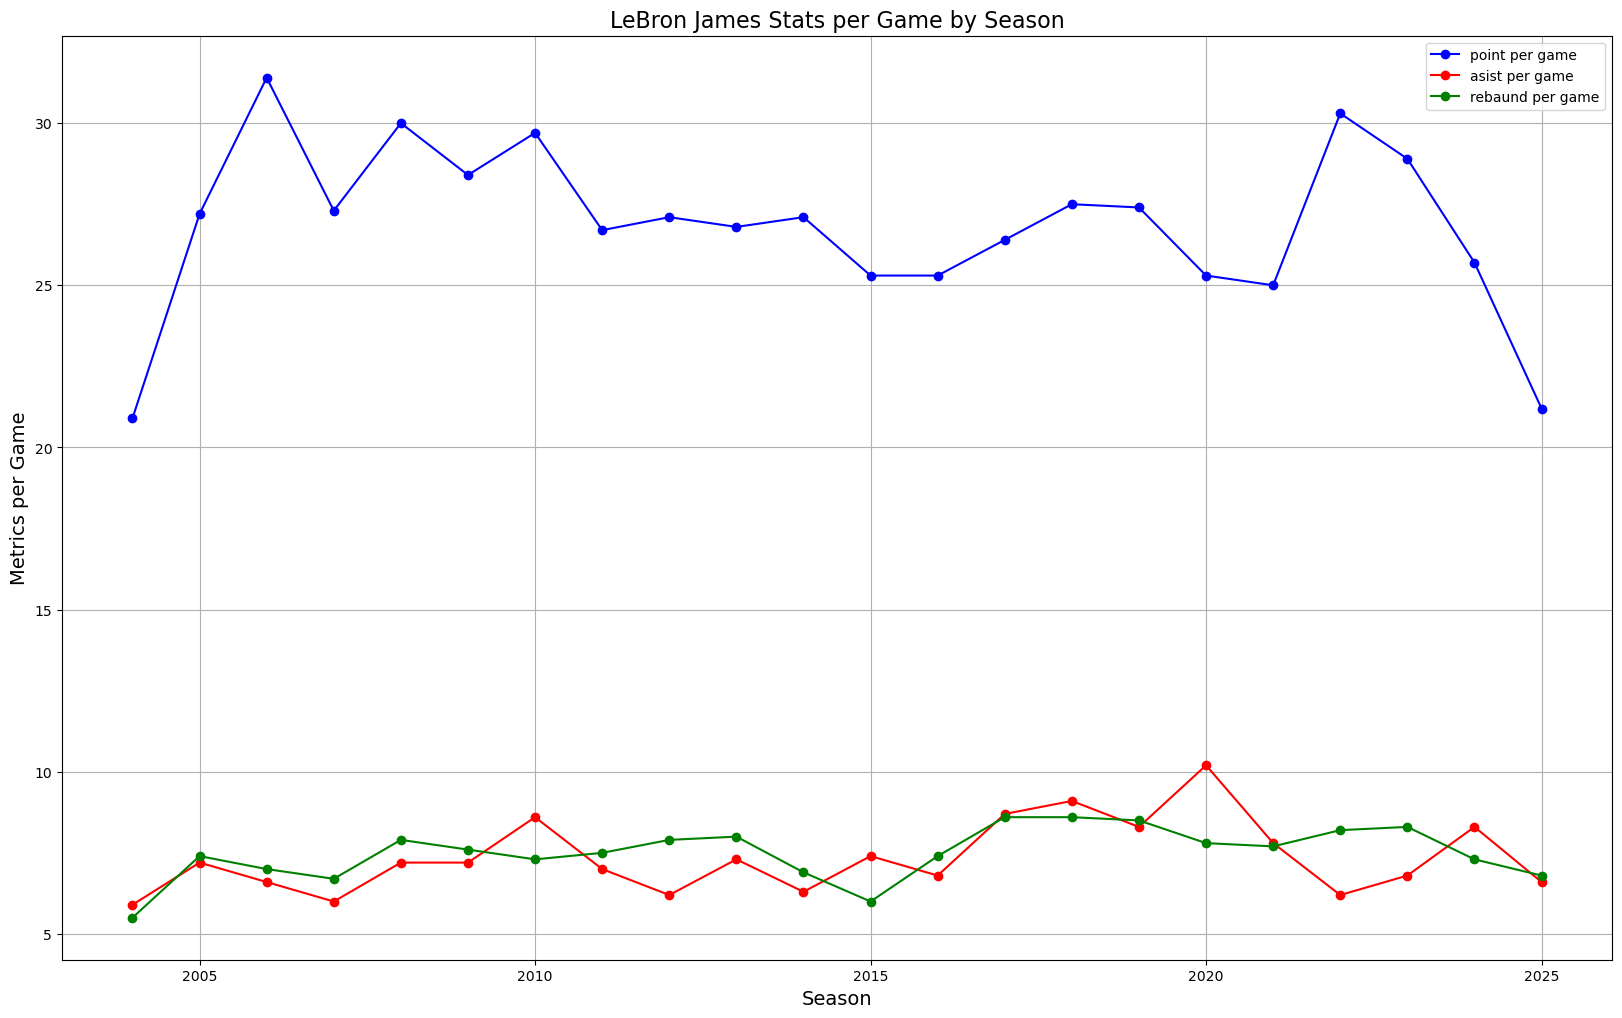

In [5]:
player_name = 'LeBron James' 
player_data = players_stats_filtered[players_stats_filtered['player'] == player_name]

plt.figure(figsize=(20,12))
plt.plot(player_data['season'], player_data['pts_per_game'], marker='o',label = 'point per game',color = 'blue')
plt.plot(player_data['season'], player_data['ast_per_game'], marker='o',label = 'asist per game',color = 'red')
plt.plot(player_data['season'], player_data['trb_per_game'], marker='o',label = 'rebaund per game',color = 'green')
plt.title(f'{player_name} Stats per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Metrics per Game', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

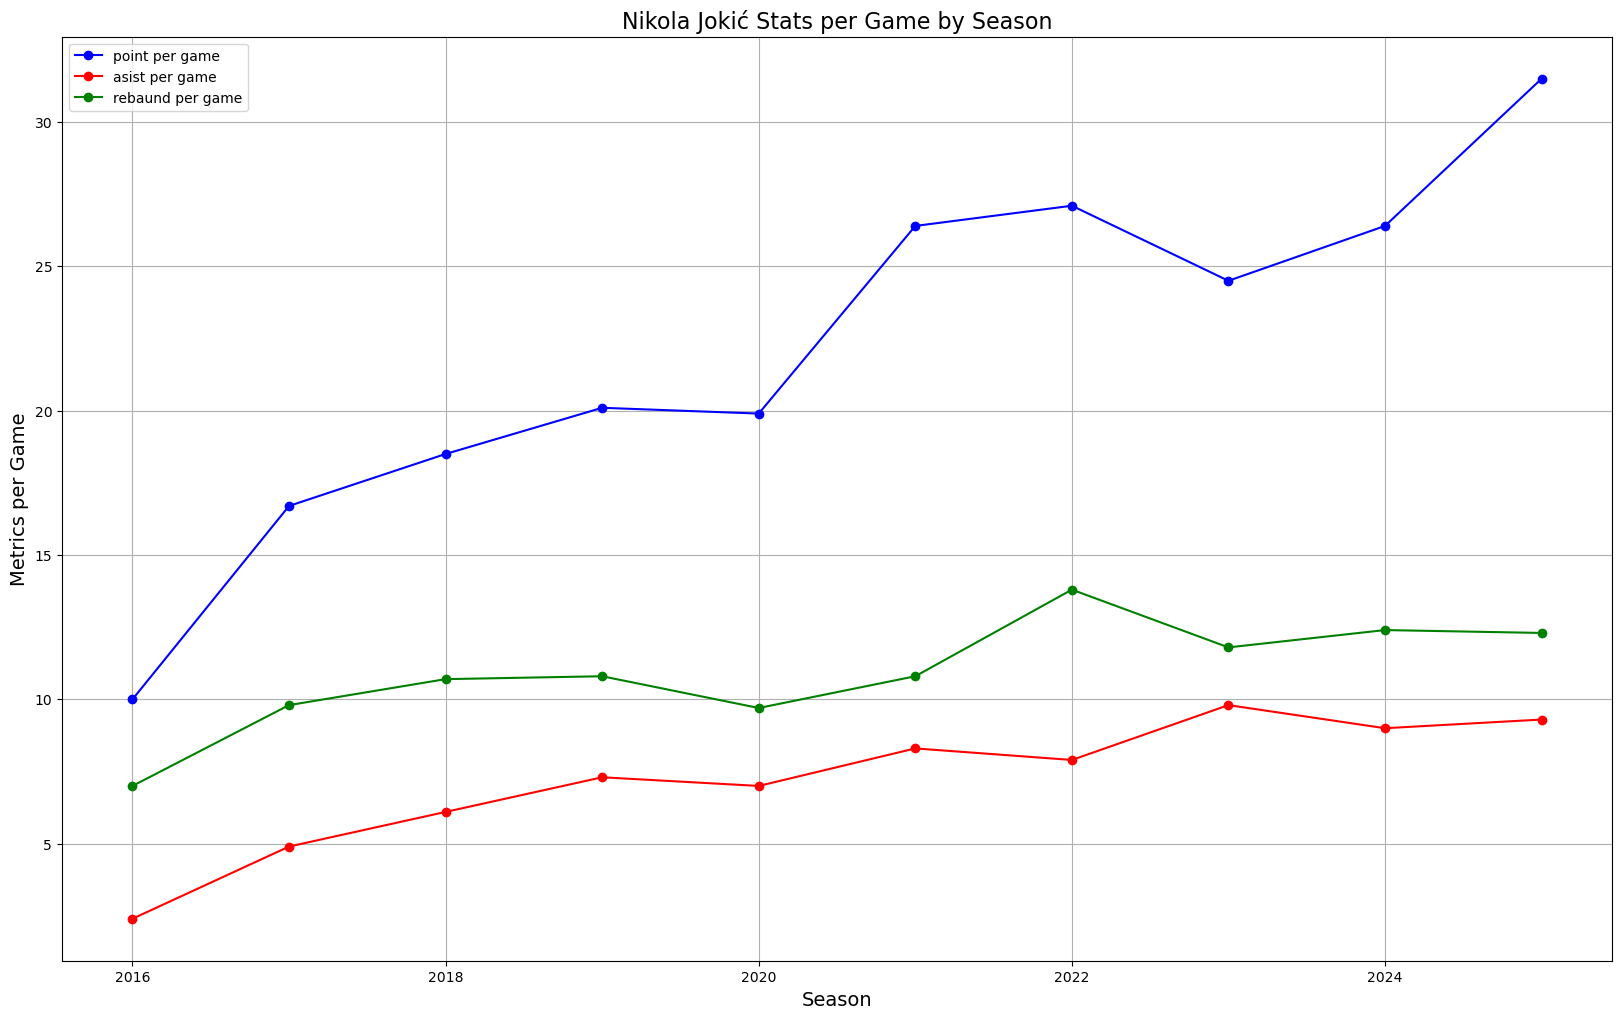

In [6]:
player_name = 'Nikola Jokić' 
player_data = players_stats_filtered[players_stats_filtered['player'] == player_name]
plt.figure(figsize=(20,12))
plt.plot(player_data['season'], player_data['pts_per_game'], marker='o',label = 'point per game',color = 'blue')
plt.plot(player_data['season'], player_data['ast_per_game'], marker='o',label = 'asist per game',color = 'red')
plt.plot(player_data['season'], player_data['trb_per_game'], marker='o',label = 'rebaund per game',color = 'green')
plt.title(f'{player_name} Stats per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Metrics per Game', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

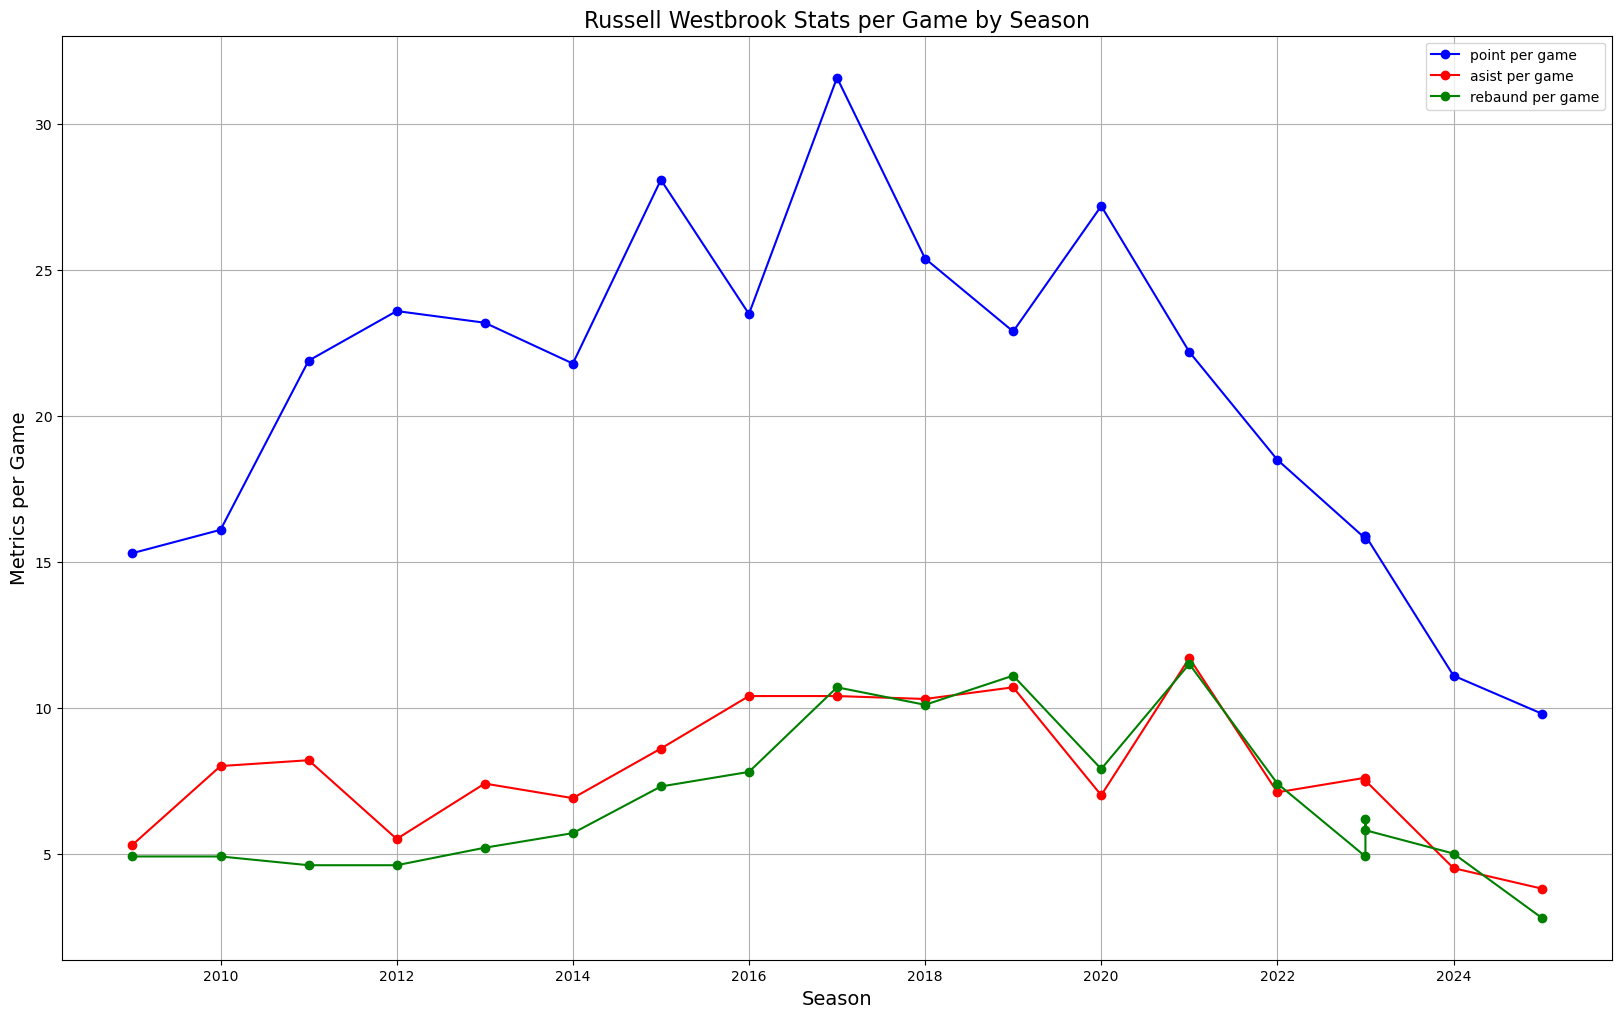

In [7]:
player_name = 'Russell Westbrook' 
player_data = players_stats_filtered[players_stats_filtered['player'] == player_name]
plt.figure(figsize=(20,12))
plt.plot(player_data['season'], player_data['pts_per_game'], marker='o',label = 'point per game',color = 'blue')
plt.plot(player_data['season'], player_data['ast_per_game'], marker='o',label = 'asist per game',color = 'red')
plt.plot(player_data['season'], player_data['trb_per_game'], marker='o',label = 'rebaund per game',color = 'green')
plt.title(f'{player_name} Stats per Game by Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Metrics per Game', fontsize = 14)
plt.legend()
plt.grid(True)
plt.show()

/var/folders/7t/gk_qv83x7jzdycfbpkl_k40r0000gn/T/ipykernel_22919/384069037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats_filtered['player'] = players_stats_filtered['player'].str.strip().str.lower()


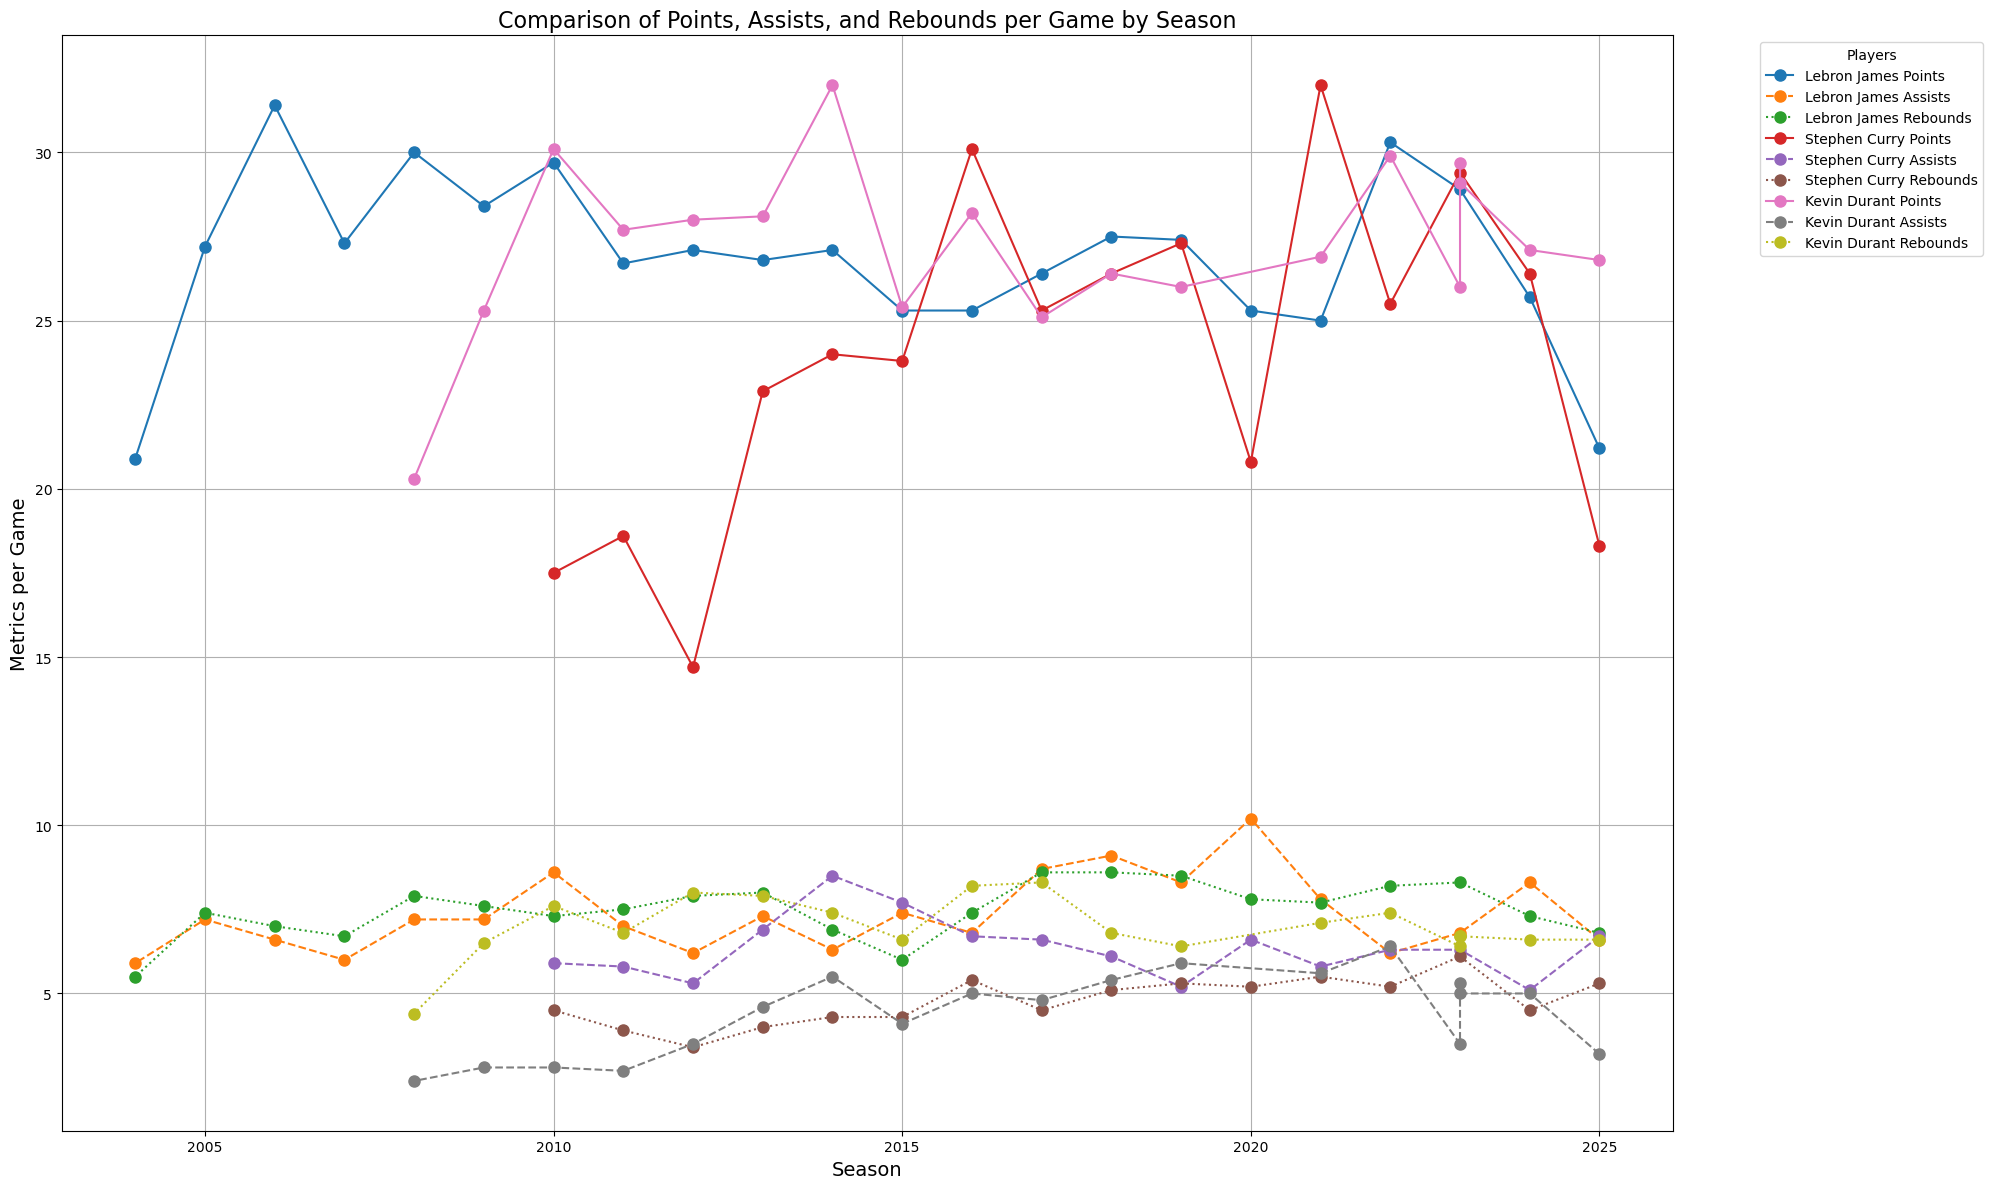

In [8]:
# List of players to compare
players = ['LeBron James', 'Stephen Curry', 'Kevin Durant']

# Standardize player names
players_stats_filtered['player'] = players_stats_filtered['player'].str.strip().str.lower()

# Create a figure
plt.figure(figsize=(20, 12))

# Loop through each player and plot their stats
for player_name in players:
    player_name = player_name.lower()  # Standardize name for comparison
    
    # Filter data for the player
    player_data = players_stats_filtered[players_stats_filtered['player'] == player_name]
    
    if not player_data.empty:
        # Plot Points per Game
        plt.plot(player_data['season'], player_data['pts_per_game'], marker='o', label=f'{player_name.title()} Points', linestyle='-', markersize=8)
        
        # Plot Assists per Game
        plt.plot(player_data['season'], player_data['ast_per_game'], marker='o', label=f'{player_name.title()} Assists', linestyle='--', markersize=8)
        
        # Plot Rebounds per Game
        plt.plot(player_data['season'], player_data['trb_per_game'], marker='o', label=f'{player_name.title()} Rebounds', linestyle=':', markersize=8)
    
# Add labels and title
plt.title('Comparison of Points, Assists, and Rebounds per Game by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Metrics per Game', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, title='Players')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


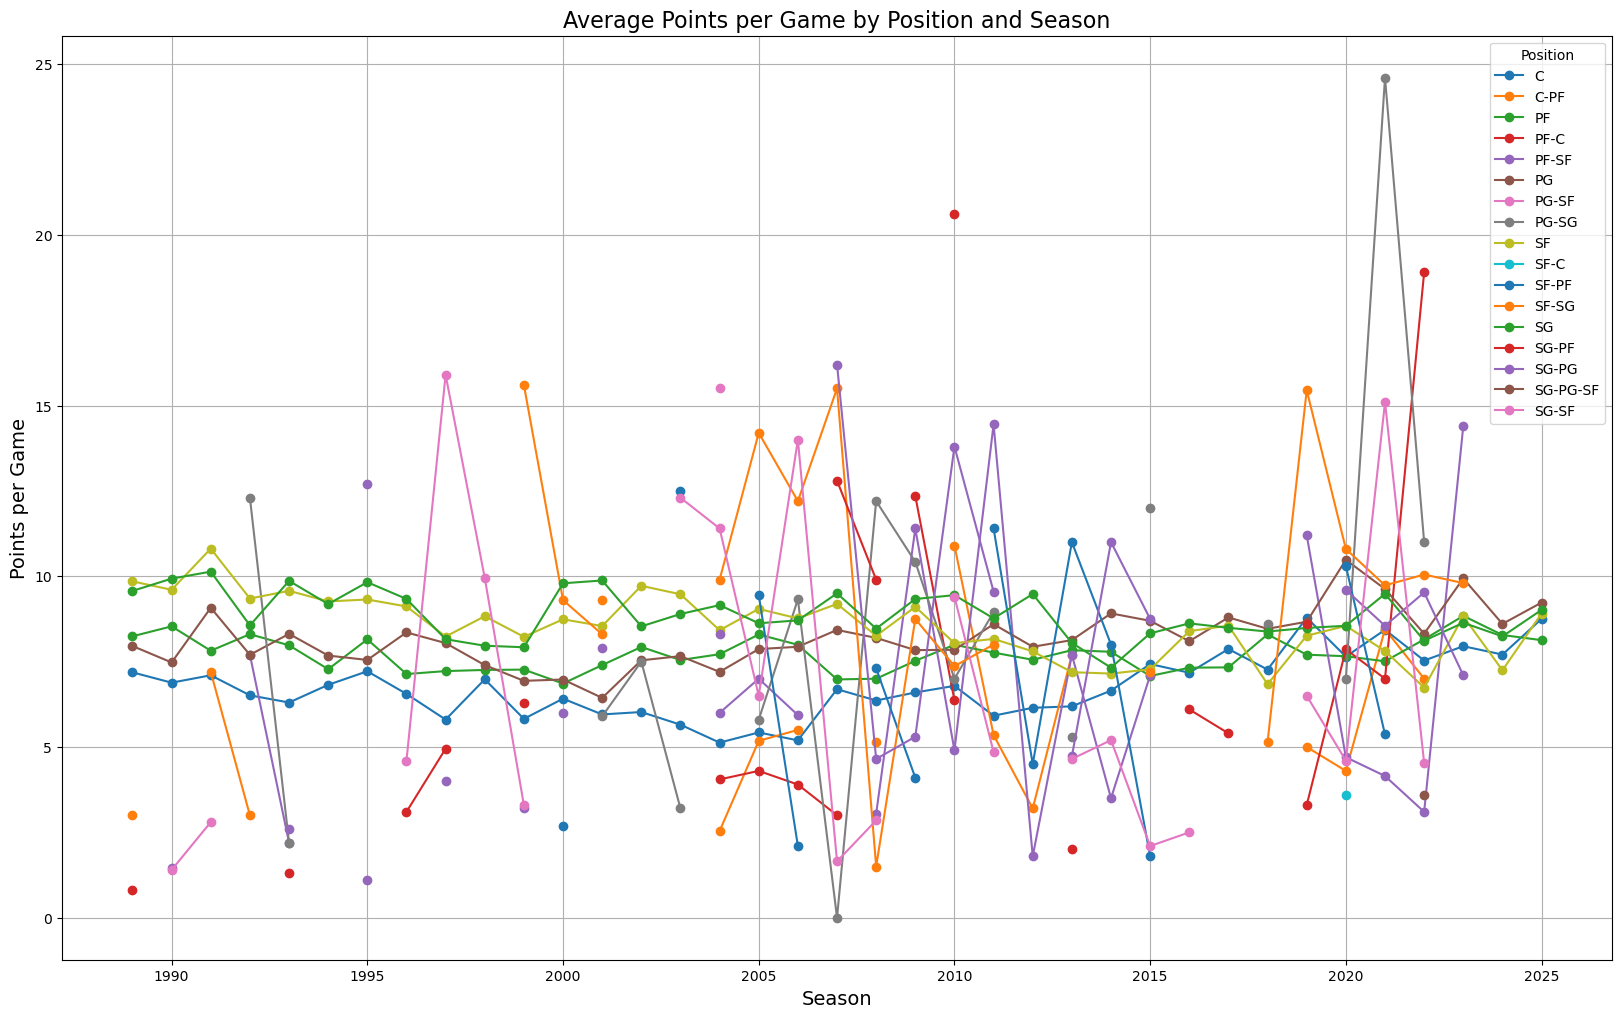

In [9]:
position_stats = players_stats_filtered.groupby(['season','pos'])['pts_per_game'].mean().reset_index()

position_pivot = position_stats.pivot(index='season', columns='pos', values = 'pts_per_game')
position_pivot.plot(figsize=(20,12), marker='o')

plt.title('Average Points per Game by Position and Season', fontsize = 16)
plt.xlabel('Season', fontsize = 14)
plt.ylabel('Points per Game', fontsize = 14)
plt.legend(title='Position')   
plt.grid(True)
plt.show()


In [10]:
import plotly.express as px

fig = px.scatter_3d(
    players_stats_filtered, 
    x='pts_per_game',
    y='trb_per_game', 
    z='ast_per_game',
    color='pos', 
    size='age', 
    hover_name='player',
    title='NBA Players Stats by Position', 
    width=1200,
    height=1200)

fig.show()  

In [11]:
fig = px.scatter( 
                  players_stats_filtered,
                  x= 'pts_per_game',
                  y= 'ast_per_game',
                  color = 'pos',
                  size='mp_per_game',
                  hover_name='player',
                  title= 'Points vs. Asists',
                  labels= {'pts_per_game':'Points per Game', 'ast_per_game':'Assists per Game'},)

fig.show()